# Kaggle Connection

In [0]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d oddrationale/mnist-in-csv

 59% 9.00M/15.2M [00:01<00:00, 6.81MB/s]
100% 15.2M/15.2M [00:01<00:00, 11.7MB/s]


In [0]:
!unzip /content/mnist-in-csv.zip

Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


# START

In [0]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [0]:
df = pd.read_csv('/content/mnist_train.csv')

In [0]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.shape

(60000, 785)

In [0]:
28*28

784

In [0]:
X_train = df.iloc[:, 1:].values
y_train = df.iloc[:, 0].values
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [0]:
def image_plot(x) :
    x = x.reshape((28,28))
    plt.imshow(x, cmap= "gray")

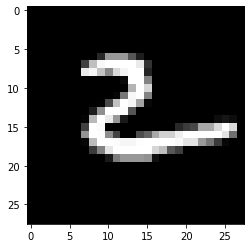

In [0]:
image_plot(X_train[109])

In [0]:
y_train[109]

2

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48000, 784), (48000,), (12000, 784), (12000,))

In [0]:
# final function
def distance(X1, X2) :
    return np.sqrt(sum((X1-X2)**2))


def knn(X, Y, testing_point,  k = 7):
    vals = []
    m = X.shape[0]
    for i in range(m):
        dist = distance(X[i] , testing_point)
        vals.append([dist , Y[i]])

    vals = sorted(vals)

    vals = vals[:k]
    vals = np.array(vals)
    #print(vals[:,1])
    
    new_val = np.unique(vals [:,1] , return_counts = True)
    #print(new_val)

    index = new_val[1].argmax()
    #print(index)

    predicting = new_val[0][index]

    #print(new_val[0][index])
    return predicting


In [0]:
pred = []
for i in tqdm(range(20)) :
    pred.append(knn(X_train, y_train, X_test[i]))

100%|██████████| 20/20 [02:00<00:00,  6.03s/it]


In [0]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 7, n_jobs= -1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
pred2 = clf.predict(X_test)

In [0]:
len(pred)

20

In [0]:
pred2.shape

(12000,)

In [0]:
(pred == pred2[:20]).sum()

20

In [0]:
(y_test == pred2).sum()/y_test.shape[0]

0.9696666666666667

# Evaluation matrix

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred2, labels= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ))

[[1155    0    1    0    0    0    6    0    0    1]
 [   0 1351    0    0    1    0    1    3    0    2]
 [  10   14 1141    2    2    1    1   17    3    1]
 [   1    4    7 1199    0    8    0    4    7    7]
 [   0   11    1    0 1111    0    2    1    0   26]
 [   1    2    0   16    0 1061   10    2    1    7]
 [   5    1    0    0    0    2 1183    0    1    0]
 [   0   15    3    0    3    0    0 1234    1   10]
 [   5   18    4   20    4   16    6    4 1068   19]
 [   4    3    0   11   11    3    2    5    4 1133]]


In [0]:
clf.score(X_test, y_test)

0.9696666666666667